In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [197]:
df=pd.read_csv('Exam_Score_Prediction.csv', sep=',' )

df = df.drop("student_id", axis=1)
df = df.drop(["facility_rating", "exam_difficulty"], axis=1)

print(df)

       age  gender   course  study_hours  class_attendance internet_access  \
0       17    male  diploma         2.78              92.9             yes   
1       23   other      bca         3.37              64.8             yes   
2       22    male     b.sc         7.88              76.8             yes   
3       20   other  diploma         0.67              48.4             yes   
4       20  female  diploma         0.89              71.6             yes   
...    ...     ...      ...          ...               ...             ...   
19995   18   other      bba         6.50              71.3             yes   
19996   18    male    b.com         3.71              41.6              no   
19997   19   other  diploma         7.88              68.2             yes   
19998   19    male      bba         4.60              76.3              no   
19999   20    male     b.sc         7.50              47.9             yes   

       sleep_hours sleep_quality   study_method  exam_score  
0

In [198]:
df.columns = [
    "age","gender","course","study_hours","class_attendance",
    "internet_access","sleep_hours","sleep_quality","study_method","exam_score"
]
numeric_cols = [
    "age","study_hours","class_attendance",
    "sleep_hours","exam_score"
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")



print(df.head())


   age  gender   course  study_hours  class_attendance internet_access  \
0   17    male  diploma         2.78              92.9             yes   
1   23   other      bca         3.37              64.8             yes   
2   22    male     b.sc         7.88              76.8             yes   
3   20   other  diploma         0.67              48.4             yes   
4   20  female  diploma         0.89              71.6             yes   

   sleep_hours sleep_quality   study_method  exam_score  
0          7.4          poor       coaching        58.9  
1          4.6       average  online videos        54.8  
2          8.5          poor       coaching        90.3  
3          5.8       average  online videos        29.7  
4          9.8          poor       coaching        43.7  


In [199]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [200]:
df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,20.473300,4.007604,70.017365,7.00856,62.513225
std,2.284458,2.308313,17.282262,1.73209,18.908491
min,17.000000,0.080000,40.600000,4.10000,19.599000
25%,18.000000,2.000000,55.100000,5.50000,48.800000
50%,20.000000,4.040000,69.900000,7.00000,62.600000
75%,22.000000,6.000000,85.000000,8.50000,76.300000
max,24.000000,7.910000,99.400000,9.90000,100.000000


In [201]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Remove exam_score safely
numeric_cols = [col for col in numeric_cols if col != "exam_score"]
print(numeric_cols)
print(categorical_cols)


['age', 'study_hours', 'class_attendance', 'sleep_hours']
['gender', 'course', 'internet_access', 'sleep_quality', 'study_method']


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'study_hours'}>],
       [<Axes: title={'center': 'class_attendance'}>,
        <Axes: title={'center': 'sleep_hours'}>]], dtype=object)

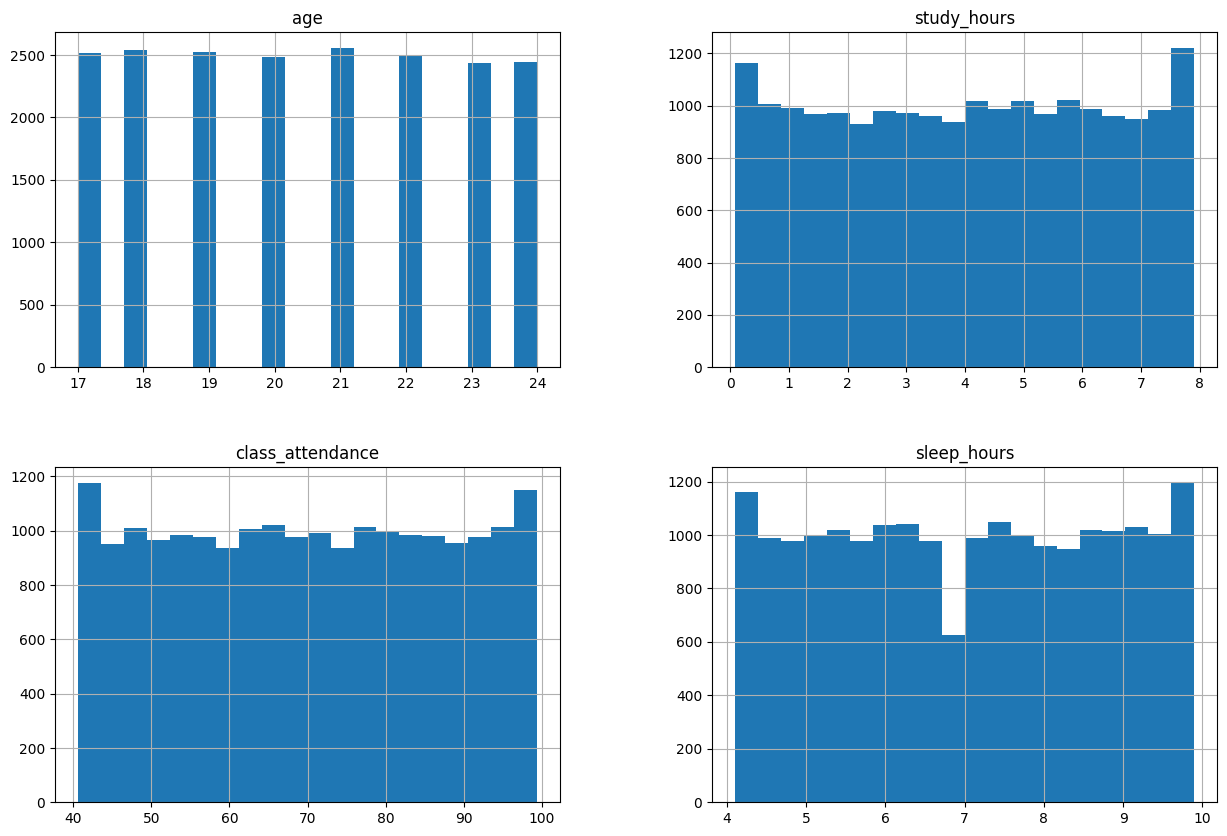

In [202]:
df[numeric_cols].hist(figsize=(15, 10), bins=20)

In [203]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



In [204]:
print(df.head())



   age  study_hours  class_attendance  sleep_hours  exam_score  gender_male  \
0   17         2.78              92.9          7.4        58.9         True   
1   23         3.37              64.8          4.6        54.8        False   
2   22         7.88              76.8          8.5        90.3         True   
3   20         0.67              48.4          5.8        29.7        False   
4   20         0.89              71.6          9.8        43.7        False   

   gender_other  course_b.sc  course_b.tech  course_ba  course_bba  \
0         False        False          False      False       False   
1          True        False          False      False       False   
2         False         True          False      False       False   
3          True        False          False      False       False   
4         False        False          False      False       False   

   course_bca  course_diploma  internet_access_yes  sleep_quality_good  \
0       False            True 

In [205]:
df.isna().sum()


age                           0
study_hours                   0
class_attendance              0
sleep_hours                   0
exam_score                    0
gender_male                   0
gender_other                  0
course_b.sc                   0
course_b.tech                 0
course_ba                     0
course_bba                    0
course_bca                    0
course_diploma                0
internet_access_yes           0
sleep_quality_good            0
sleep_quality_poor            0
study_method_group study      0
study_method_mixed            0
study_method_online videos    0
study_method_self-study       0
dtype: int64

In [206]:
df.dropna
X = df.drop("exam_score", axis=1)
y = df["exam_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

Linear Regression


In [207]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_predlr=model_lr.predict(X_test)


Ridge Regression

In [208]:
model_ridge = Ridge(alpha=1.0, random_state=42)
model_ridge.fit(X_train, y_train)

model_lr.predict(X_test)

array([36.98941839, 76.20698433, 58.1504963 , ..., 61.73530738,
       62.68787955, 52.38849152], shape=(4000,))

Lasso Regression

In [209]:
model_lasso = Lasso(alpha=0.001, max_iter=5000, random_state=42)
model_lasso.fit(X_train, y_train)

model_lasso.predict(X_test)

array([36.9897751 , 76.18398054, 58.14293584, ..., 61.72807267,
       62.71896674, 52.41960543], shape=(4000,))

ElasticNet Regression

In [210]:
model_elastic = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=5000, random_state=42)
model_elastic.fit(X_train, y_train)

model_elastic.predict(X_test)

array([37.02057937, 76.11324609, 58.16459877, ..., 61.75270724,
       62.72330467, 52.42534955], shape=(4000,))

Decision Tree (Regression)

In [211]:
model_dt = DecisionTreeRegressor(max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
model_dt.fit(X_train, y_train)

model_dt.predict(X_test)

array([38.50285714, 68.63846154, 64.36      , ..., 69.93513514,
       68.89298246, 47.02692308], shape=(4000,))

Random Forest (Regression)

In [212]:
model_rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42, bootstrap=True)
model_rf.fit(X_train, y_train)

model_rf.predict(X_test)

array([35.7709585 , 68.95108599, 64.55207368, ..., 65.10386166,
       67.74246786, 51.37070697], shape=(4000,))

Gradient Boosting

In [213]:
model_gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)

model_gb.predict(X_test)

array([35.22205826, 73.60587593, 59.90256204, ..., 61.37532366,
       63.44543737, 51.97504575], shape=(4000,))

Support Vector Regressor

In [214]:
model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model_svr.fit(X_train, y_train)

model_svr.predict(X_test)

array([36.34127305, 70.41425936, 60.42406813, ..., 61.32652923,
       63.23682223, 52.7977523 ], shape=(4000,))

K-Nearest Neighbors Regressor

In [215]:
model_knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
model_knn.fit(X_train, y_train)

model_knn.predict(X_test)

array([33.36696367, 70.88032341, 55.40363961, ..., 56.63850001,
       51.80663176, 54.56311905], shape=(4000,))

Models evaluation

In [216]:
models = {
    "Linear Regression": model_lr,
    "Ridge Regression": model_ridge,
    "Lasso Regression": model_lasso,
    "Random Forest Regressor": model_rf,
    "Gradient Boosting Regressor": model_gb,
    "SVR": model_svr,
    "KNN Regressor": model_knn
}

summary_rows = []

for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    # Print
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

    # Add to summary table
    summary_rows.append({
        "Model": name,
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "RMSE": round(rmse, 4),
        "R² Score": round(r2, 4),
    })

summary_df = pd.DataFrame(summary_rows).set_index("Model")
summary_df


=== Linear Regression ===
MAE:  8.2983
MSE:  105.8524
RMSE: 10.2885
R²:   0.7041

=== Ridge Regression ===
MAE:  8.2983
MSE:  105.8511
RMSE: 10.2884
R²:   0.7041

=== Lasso Regression ===
MAE:  8.2983
MSE:  105.8468
RMSE: 10.2882
R²:   0.7041

=== Random Forest Regressor ===
MAE:  8.8034
MSE:  118.4005
RMSE: 10.8812
R²:   0.6690

=== Gradient Boosting Regressor ===
MAE:  8.3868
MSE:  107.6660
RMSE: 10.3762
R²:   0.6990

=== SVR ===
MAE:  8.4965
MSE:  109.9474
RMSE: 10.4856
R²:   0.6926

=== KNN Regressor ===
MAE:  9.5524
MSE:  140.1278
RMSE: 11.8376
R²:   0.6082


,MAE,MSE,RMSE,R² Score
Model,,,,
Linear Regression,8.2983,105.8524,10.2885,0.7041
Ridge Regression,8.2983,105.8511,10.2884,0.7041
Lasso Regression,8.2983,105.8468,10.2882,0.7041
Random Forest Regressor,8.8034,118.4005,10.8812,0.6690
Gradient Boosting Regressor,8.3868,107.6660,10.3762,0.6990
SVR,8.4965,109.9474,10.4856,0.6926
KNN Regressor,9.5524,140.1278,11.8376,0.6082
